In [30]:
import sys
import os
import importlib

# Ajout du chemin une fois
sys.path.append(os.path.abspath('../python_files'))

# Liste des noms des modules à importer et recharger
module_names = [
    'preprocessing',
    'imports',
    'files',
    'clustering',
    'profile_prediction',
    'prediction_24h'
]

# Import et reload automatique
modules = {}
for name in module_names:
    modules[name] = importlib.import_module(name)
    importlib.reload(modules[name])

# Importer tout en global namespace (équivalent à from ... import *)
for name in module_names:
    exec(f'from {name} import *')


In [230]:
consommation_chauffage = extract_and_concat_consommation(Simulation_Dataset, column_index=4, prefix="consommation_heat_")


In [231]:

# Exemple d'utilisation
city_groups = {
    "Weather_Dataset": Weather_Dataset
   
    
}

prefix_column_map = {
    "Text_": 1,
    "Hum_": 3,
    "Wind_": 4,
    "Solar_": 5,
    "Ground_": 10
}

combined_data = extract_and_combine_all(city_groups, prefix_column_map)

city_groups = {
    "Simulation_Dataset":Simulation_Dataset  
}

prefix_column_map = {
    "Tint_": 2,   
}

combined_Tint = extract_and_combine_all(city_groups, prefix_column_map)


In [232]:
Text_combined = combined_data.get('Text_combined_Weather_Dataset')
Hum_combined = combined_data.get('Hum_combined_Weather_Dataset')
Wind_combined = combined_data.get('Wind_combined_Weather_Dataset')
Tint_combined = combined_Tint.get('Tint_combined_Simulation_Dataset')


In [233]:
start_date = "2018-01-01"
dates = pd.date_range(start=start_date, periods=len(consommation_chauffage), freq="D") 
consommation_chauffage.insert(0, "Date", dates)
Text_combined.insert(0, "Date", dates)
Hum_combined.insert(0, "Date", dates)

In [222]:
def add_heating_season(df, date_column='Date'):
    """
    Ajoute une colonne 'heat_on' qui vaut 1 si la date est entre le 1er novembre et le 30 avril, sinon 0.

    """ 
    # Extraire le mois et le jour
    month_day = df[date_column].dt.month * 100 + df[date_column].dt.day
    
    # Appliquer la condition: 1 si entre 1101 (1er nov) et 0430 (30 avril), sinon 0
    df['heat_on'] = ((month_day >= 1101) | (month_day <= 430)).astype(int)
    
    return df



In [235]:

add_heating_season(consommation_chauffage)
add_heating_season(Text_combined)
add_heating_season(Hum_combined)

,Date,0,1,2,3,4,5,6,7,8,...,15,16,17,18,19,20,21,22,23,heat_on
0,2018-01-01,82.0,81.0,80.5,83.0,84.5,84.0,85.0,85.0,81.0,...,58.0,72.0,79.0,83.5,83.0,84.0,86.0,86.5,86.5,1
1,2018-01-02,87.0,88.0,88.5,89.0,89.0,89.5,89.5,89.5,90.0,...,86.0,86.5,88.0,89.5,89.5,89.5,90.5,91.0,91.0,1
2,2018-01-03,91.0,90.0,88.0,84.5,80.5,78.0,76.0,76.0,78.0,...,69.5,69.0,71.0,73.5,75.0,75.5,75.5,80.0,85.0,1
3,2018-01-04,85.0,84.5,84.5,85.0,84.5,83.5,82.5,81.5,80.5,...,61.0,60.5,63.0,69.5,74.5,74.5,70.5,73.0,77.5,1
4,2018-01-05,76.5,76.0,77.0,79.5,81.5,83.0,84.5,84.5,84.5,...,55.5,60.0,68.0,75.0,79.0,82.5,86.5,91.0,94.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2550,2024-12-25,98.0,98.5,99.5,100.0,100.0,100.0,99.5,99.5,100.0,...,72.5,70.5,73.0,78.0,82.5,87.5,92.0,94.5,96.5,1
2551,2024-12-26,98.5,99.0,99.0,99.5,100.0,100.0,99.5,99.0,99.0,...,58.0,58.5,65.0,74.5,81.0,83.0,84.5,86.0,89.0,1
2552,2024-12-27,90.5,90.5,91.5,92.0,92.0,92.5,93.5,94.5,94.5,...,55.5,54.0,59.0,72.5,83.0,86.5,88.5,92.0,95.0,1
2553,2024-12-28,97.0,98.0,98.0,98.5,99.0,99.0,99.5,100.0,100.0,...,89.5,87.0,86.5,90.0,93.0,93.5,94.5,95.5,96.5,1


In [ ]:
df_conso = consommation_chauffage[consommation_chauffage["heat_on"] == 1].copy()
df_Text = Text_combined[Text_combined["heat_on"] == 1].copy()
df_Hum = Hum_combined[Hum_combined["heat_on"] == 1].copy()



In [205]:
clustering_heat_toulouse = clustering(
    df=df_conso.drop(columns=["Date"]),  
    n_parts=1,                          
    status_column="heat_on",           
    n_clusters_list=[3]                
)



In [304]:
clustering_heat_toulouse

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,heat_on,clusters_1
0,0.000000,1191.035222,1312.758731,1419.587492,1513.174730,1578.453365,1964.393414,2340.466249,2674.424141,1974.679566,...,46.882802,0.000000,12.597284,165.032178,309.615664,454.360768,581.485442,692.696269,1,2.0
1,810.107258,932.496397,1038.400298,1125.989678,1203.801168,1262.344356,1615.840151,1906.159536,2163.834353,2141.193211,...,1081.300624,1000.744376,927.574038,938.912098,939.342954,961.082691,984.154059,990.419856,1,2.0
2,1003.897458,1022.899320,1018.746767,970.512303,901.581261,847.178108,864.854141,891.012656,970.925253,970.136841,...,0.000000,0.000000,0.000000,68.356592,200.292594,324.326513,405.764384,454.396293,1,0.0
3,451.649622,406.502586,397.278571,433.969041,460.460104,465.801117,535.085130,594.731588,656.292158,455.754993,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,151.197296,592.619330,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2550,1605.074900,1673.802791,1749.746059,1814.140401,1884.247242,1932.504941,2389.442901,2854.274773,3334.017349,3393.166644,...,0.000000,0.000000,0.000000,0.000000,0.000000,18.229098,139.156888,406.034844,1,2.0
2551,660.441056,897.777933,1125.002529,1360.252001,1596.879163,1773.812846,2531.772790,3289.754074,4023.299986,4152.826945,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,2.0
2552,99.357387,360.536351,651.431965,922.717024,1171.258973,1403.311155,2253.423156,3123.909377,3295.018004,3352.155612,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,2.0
2553,0.000000,72.204610,312.528293,570.636102,746.392481,942.524086,1143.985066,1310.357498,1463.278973,1586.000126,...,218.062033,321.023562,735.785798,1019.575515,1227.225707,1398.159522,1555.576905,1690.983459,1,0.0


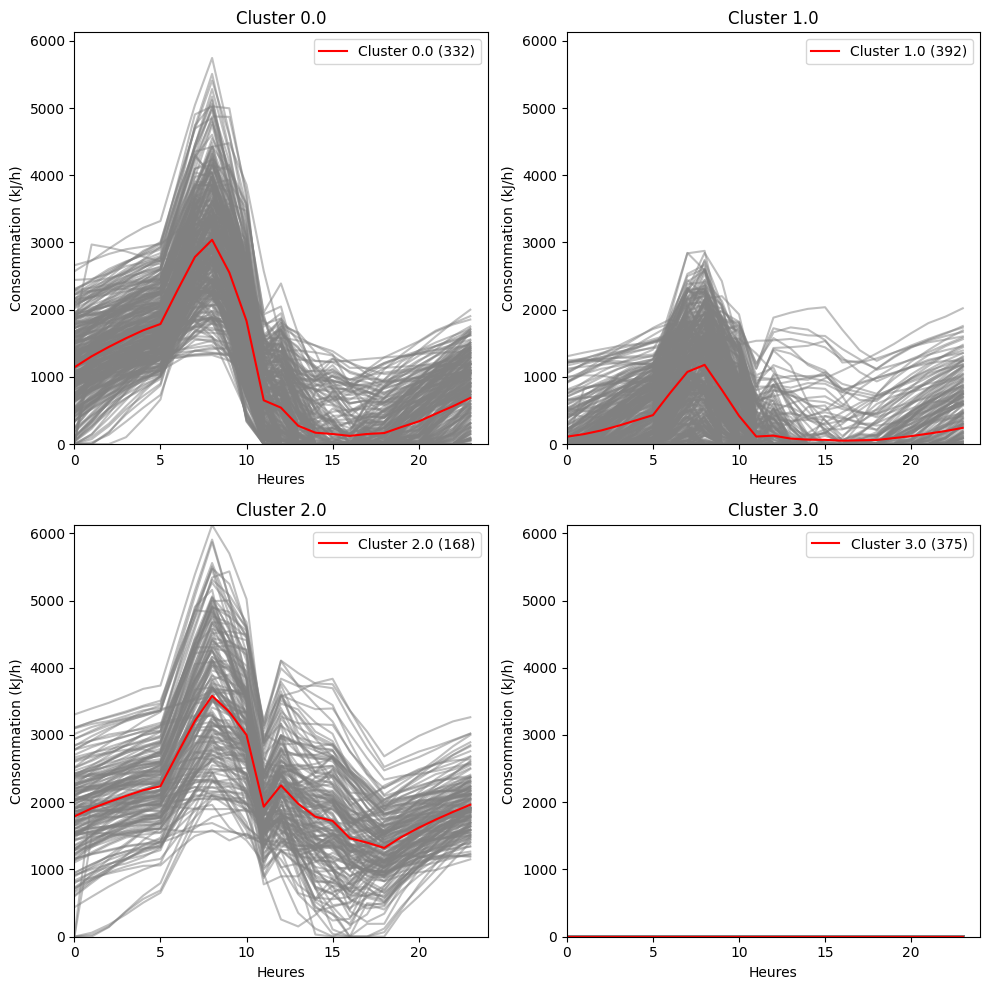

In [175]:
plot_clusters(clustering_heat_toulouse.drop(columns=["heat_on"]))

In [339]:
Text_conso_heat_tou=pd.concat([df_Text.drop(columns=["heat_on"]),clustering_heat_toulouse],axis=1)

In [309]:
Text_combined['clusters'] = 4

# Assigner les valeurs de clustering_heat_toulouse uniquement pour les indices correspondants
valid_indices = Text_combined.index.intersection(clustering_heat_toulouse.index)
Text_combined.loc[valid_indices, 'clusters'] = clustering_heat_toulouse.loc[valid_indices, 'clusters_1'].values

In [351]:
Text_conso_heat_tou

,Date,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,cluster,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,heat_on,clusters_1,date
0,2018-01-01,9.060,8.930,8.500,8.140,7.985,7.810,7.800,7.810,7.950,8.760,10.415,12.350,13.595,14.290,14.290,12.995,11.430,10.350,9.955,10.115,10.080,9.875,9.740,9.695,2.0,0.000000,1191.035222,1312.758731,1419.587492,1513.174730,1578.453365,1964.393414,2340.466249,2674.424141,1974.679566,764.431616,0.000000,0.000000,0.000000,0.000000,0.000000,46.882802,0.000000,12.597284,165.032178,309.615664,454.360768,581.485442,692.696269,1,2.0,2018-01-01
1,2018-01-02,9.500,9.200,8.975,8.840,8.770,8.620,8.660,8.930,9.170,9.260,9.500,10.340,11.485,12.410,12.905,13.140,13.225,13.055,12.945,13.215,13.515,13.560,13.555,13.675,2.0,810.107258,932.496397,1038.400298,1125.989678,1203.801168,1262.344356,1615.840151,1906.159536,2163.834353,2141.193211,2045.397519,1392.473496,1642.885784,1425.817471,1235.423295,1216.862847,1081.300624,1000.744376,927.574038,938.912098,939.342954,961.082691,984.154059,990.419856,1,2.0,2018-01-02
2,2018-01-03,13.715,13.685,13.870,14.490,15.240,15.570,15.760,15.765,15.485,15.330,15.450,15.780,16.045,16.045,15.995,15.965,15.585,14.830,14.145,13.705,13.270,12.950,12.925,13.190,0.0,1003.897458,1022.899320,1018.746767,970.512303,901.581261,847.178108,864.854141,891.012656,970.925253,970.136841,727.212779,200.974158,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68.356592,200.292594,324.326513,405.764384,454.396293,1,0.0,2018-01-03
3,2018-01-04,13.885,14.855,15.375,15.390,15.465,15.500,15.530,15.540,15.495,15.550,15.670,16.095,16.830,17.575,17.960,17.720,17.085,15.990,14.390,13.095,12.725,13.040,12.810,12.335,0.0,451.649622,406.502586,397.278571,433.969041,460.460104,465.801117,535.085130,594.731588,656.292158,455.754993,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.0,2018-01-04
4,2018-01-05,12.245,12.035,11.640,11.025,10.375,9.815,9.370,9.015,8.880,9.885,11.990,14.050,15.505,16.080,15.950,15.425,14.475,13.225,12.145,11.430,10.940,10.560,10.225,9.995,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,151.197296,592.619330,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.0,2018-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2550,2024-12-25,6.590,6.480,6.280,6.235,6.215,6.090,5.925,5.740,5.530,5.370,5.360,5.505,6.120,7.320,8.645,9.515,9.775,9.115,7.860,6.700,5.365,4.310,4.000,3.610,NaN,1605.074900,1673.802791,1749.746059,1814.140401,1884.247242,1932.504941,2389.442901,2854.274773,3334.017349,3393.166644,2897.446845,1401.762495,1387.391695,421.342997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.229098,139.156888,406.034844,1,2.0,2024-12-25
2551,2024-12-26,3.025,2.570,2.105,1.640,1.165,0.835,0.600,0.355,0.255,0.015,0.895,3.440,6.090,8.420,10.260,11.510,11.910,10.490,7.680,5.625,4.505,3.650,2.930,1.945,NaN,660.441056,897.777933,1125.002529,1360.252001,1596.879163,1773.812846,2531.772790,3289.754074,4023.299986,4152.826945,3184.481888,849.984835,345.230401,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,2.0,2024-12-26
2552,2024-12-27,1.180,0.855,0.530,0.130,-0.230,-0.565,-0.910,-1.245,-1.405,-1.105,0.330,3.060,6.205,9.055,11.305,12.715,12.940,11.280,7.770,4.745,3.640,3.045,2.060,1.485,NaN,99.357387,360.536351,651.431965,922.717024,1171.258973,1403.311155,2253.423156,3123.909377,3295.018004,3352.155612,2251.612451,415.063058,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,2.0,2024-12-27
2553,2024-12-28,1.145,0.350,-0.360,-0.480,-0.235,-0.165,-0.150,-0.035,0.020,0.145,

In [408]:
import pandas as pd

# Assurer que les dates sont bien en format datetime
Text_conso_heat_tou['date'] = pd.to_datetime(Text_conso_heat_tou['date'])
Text_combined['date'] = pd.to_datetime(Text_combined['date'])

# Trier les données par date
Text_conso_heat_tou = Text_conso_heat_tou.sort_values('date')
Text_combined = Text_combined.sort_values('date')

# Créer une liste pour stocker les lignes combinées
combined_rows = []

# Parcourir chaque ligne de Text_conso_heat_tou
for index, row in Text_conso_heat_tou.iterrows():
    jour_precedent = row['date'] - pd.Timedelta(days=1)  # Trouver jour j-1
    
    # Vérifier si j-1 existe dans Text_combined
    prev_row = Text_combined[Text_combined['date'] == jour_precedent]
    
    if not prev_row.empty:
        prev_row = prev_row.iloc[0]  # Sélectionner uniquement la première correspondance
        
        # Ajouter un suffixe "_j-1" aux colonnes du jour précédent
        prev_row = prev_row.rename(lambda x: f"{x}_j-1")

        # Fusionner proprement les deux lignes
        combined_row = pd.concat([prev_row.to_frame().T.reset_index(drop=True), 
                                  row.to_frame().T.reset_index(drop=True)], axis=1)
        
        combined_rows.append(combined_row)  # Ajouter la ligne fusionnée
    else:
        # Si aucune correspondance, passer à la ligne suivante sans l'ajouter
        continue

# Convertir la liste en DataFrame final
Text_final = pd.concat(combined_rows, ignore_index=True)

# Vérification du résultat
pd.set_option('display.max_columns', None)
print(Text_final.head())  # Affichage des premières lignes


              Date_j-1   0_j-1   1_j-1   2_j-1   3_j-1   4_j-1  5_j-1  6_j-1  \
0  2018-01-01 00:00:00    9.06    8.93     8.5    8.14   7.985   7.81    7.8   
1  2018-01-02 00:00:00     9.5     9.2   8.975    8.84    8.77   8.62   8.66   
2  2018-01-03 00:00:00  13.715  13.685   13.87   14.49   15.24  15.57  15.76   
3  2018-01-04 00:00:00  13.885  14.855  15.375   15.39  15.465   15.5  15.53   
4  2018-01-05 00:00:00  12.245  12.035   11.64  11.025  10.375  9.815   9.37   

    7_j-1   8_j-1  9_j-1  10_j-1  11_j-1  12_j-1  13_j-1  14_j-1  15_j-1  \
0    7.81    7.95   8.76  10.415   12.35  13.595   14.29   14.29  12.995   
1    8.93    9.17   9.26     9.5   10.34  11.485   12.41  12.905   13.14   
2  15.765  15.485  15.33   15.45   15.78  16.045  16.045  15.995  15.965   
3   15.54  15.495  15.55   15.67  16.095   16.83  17.575   17.96   17.72   
4   9.015    8.88  9.885   11.99   14.05  15.505   16.08   15.95  15.425   

   16_j-1  17_j-1  18_j-1  19_j-1  20_j-1 21_j-1  22_j-1  23_j

In [409]:
print(Text_final.iloc[0].to_frame().T)


              Date_j-1 0_j-1 1_j-1 2_j-1 3_j-1  4_j-1 5_j-1 6_j-1 7_j-1 8_j-1  \
0  2018-01-01 00:00:00  9.06  8.93   8.5  8.14  7.985  7.81   7.8  7.81  7.95   

  9_j-1  10_j-1 11_j-1  12_j-1 13_j-1 14_j-1  15_j-1 16_j-1 17_j-1 18_j-1  \
0  8.76  10.415  12.35  13.595  14.29  14.29  12.995  11.43  10.35  9.955   

   19_j-1 20_j-1 21_j-1 22_j-1 23_j-1 heat_on_j-1 clusters_j-1  \
0  10.115  10.08  9.875   9.74  9.695           1            2   

              date_j-1                 Date    0    1      2     3     4  \
0  2018-01-01 00:00:00  2018-01-02 00:00:00  9.5  9.2  8.975  8.84  8.77   

      5     6     7     8     9   10     11      12     13      14     15  \
0  8.62  8.66  8.93  9.17  9.26  9.5  10.34  11.485  12.41  12.905  13.14   

       16      17      18      19      20     21      22      23 cluster  \
0  13.225  13.055  12.945  13.215  13.515  13.56  13.555  13.675     2.0   

            0           1            2            3            4            5  \
0  810.

In [410]:
# Supprimer toutes les colonnes qui contiennent "Date" sous n'importe quelle forme (ex: Date, date_j-1, dates, etc.)
Text_final = Text_final.drop(columns=[col for col in Text_final.columns if "date" in str(col).lower()], errors='ignore')

# Vérification du résultat
Text_final  # Affichage des premières lignes après suppression


,0_j-1,1_j-1,2_j-1,3_j-1,4_j-1,5_j-1,6_j-1,7_j-1,8_j-1,9_j-1,10_j-1,11_j-1,12_j-1,13_j-1,14_j-1,15_j-1,16_j-1,17_j-1,18_j-1,19_j-1,20_j-1,21_j-1,22_j-1,23_j-1,heat_on_j-1,clusters_j-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,cluster,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,heat_on,clusters_1
0,9.06,8.93,8.5,8.14,7.985,7.81,7.8,7.81,7.95,8.76,10.415,12.35,13.595,14.29,14.29,12.995,11.43,10.35,9.955,10.115,10.08,9.875,9.74,9.695,1,2,9.5,9.2,8.975,8.84,8.77,8.62,8.66,8.93,9.17,9.26,9.5,10.34,11.485,12.41,12.905,13.14,13.225,13.055,12.945,13.215,13.515,13.56,13.555,13.675,2.0,810.107258,932.496397,1038.400298,1125.989678,1203.801168,1262.344356,1615.840151,1906.159536,2163.834353,2141.193211,2045.397519,1392.473496,1642.885784,1425.817471,1235.423295,1216.862847,1081.300624,1000.744376,927.574038,938.912098,939.342954,961.082691,984.154059,990.419856,1,2.0
1,9.5,9.2,8.975,8.84,8.77,8.62,8.66,8.93,9.17,9.26,9.5,10.34,11.485,12.41,12.905,13.14,13.225,13.055,12.945,13.215,13.515,13.56,13.555,13.675,1,2,13.715,13.685,13.87,14.49,15.24,15.57,15.76,15.765,15.485,15.33,15.45,15.78,16.045,16.045,15.995,15.965,15.585,14.83,14.145,13.705,13.27,12.95,12.925,13.19,0.0,1003.897458,1022.89932,1018.746767,970.512303,901.581261,847.178108,864.854141,891.012656,970.925253,970.136841,727.212779,200.974158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.356592,200.292594,324.326513,405.764384,454.396293,1,0.0
2,13.715,13.685,13.87,14.49,15.24,15.57,15.76,15.765,15.485,15.33,15.45,15.78,16.045,16.045,15.995,15.965,15.585,14.83,14.145,13.705,13.27,12.95,12.925,13.19,1,0,13.885,14.855,15.375,15.39,15.465,15.5,15.53,15.54,15.495,15.55,15.67,16.095,16.83,17.575,17.96,17.72,17.085,15.99,14.39,13.095,12.725,13.04,12.81,12.335,0.0,451.649622,406.502586,397.278571,433.969041,460.460104,465.801117,535.08513,594.731588,656.292158,455.754993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0
3,13.885,14.855,15.375,15.39,15.465,15.5,15.53,15.54,15.495,15.55,15.67,16.095,16.83,17.575,17.96,17.72,17.085,15.99,14.39,13.095,12.725,13.04,12.81,12.335,1,0,12.245,12.035,11.64,11.025,10.375,9.815,9.37,9.015,8.88,9.885,11.99,14.05,15.505,16.08,15.95,15.425,14.475,13.225,12.145,11.43,10.94,10.56,10.225,9.995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151.197296,592.61933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0
4,12.245,12.035,11.64,11.025,10.375,9.815,9.37,9.015,8.88,9.885,11.99,14.05,15.505,16.08,15.95,15.425,14.475,13.225,12.145,11.43,10.94,10.56,10.225,9.995,1,0,9.815,9.505,9.265,9.1,8.87,8.605,8.365,8.175,7.94,7.59,7.325,7.19,7.225,7.4,7.585,7.825,8.05,8.205,8.305,8.28,8.085,7.9,8.16,8.895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187.430889,527.803388,708.210542,894.200212,1037.40593,801.974655,884.560089,934.234911,989.635974,1023.288454,802.334674,893.639847,979.936063,1064.245187,1144.028511,1200.659287,1239.047072,1239.720268,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1261,7.825,7.755,7.67,7.635,7.59,7.45,7.255,7.1,7.0,6.98,7.055,7.16,7.435,7.785,7.94,7.925,7.785,7.605,7.44,7.225,7.135,6.935,6.725,6.67,1,1,6.59,6.48,6.28,6.235,6.215,6.09,5.925,5.74,5.53,5.37,5.36,5.505,6.12,7.32,8.645,9.515,9.775,9.115,7.86,6.7,5.365,4.31,4.0,3.61,NaN,1605.0749,1673.802791,1749.746059,1814.140401,1884.247242,1932.504941,2389.442901,2854.274773,3334.017349,3393.166644,2897.446845,1401.762495,1387.391695,421.342997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.229098,139.156888,406.034844,1,2.0
1262,6.59,6.48,6.28,6.235,6.215,6.09,5.925,5.74,5.53,5.37,5.36,5.505,6.12,7.32,8.645,9.515,9.775,9.115,7.86,6.7,5.365,4.31,4.0,3.61,1,2,3.025,2.57,2.105,1.64,1.165,0.835,0.6,0.355,0.255,0.015,0.895,3.44,6.09,8.42,10.26,11.51,11.91,10.49,7.68,5.625,4.505,3.65,2.93,1.945,NaN,660.441056,897.777933,1125.

In [411]:
import pandas as pd

# Supposons que Text_final est votre DataFrame
cols = Text_final.columns.tolist()

# 1. Identifier les colonnes à déplacer
two_last_cols = cols[-2:]  # Les deux dernières colonnes
twentyfour_last_cols = cols[-24:]  # Les 24 dernières colonnes

# 2. Nouvel ordre :
# - Toutes les colonnes sauf les 2 dernières et les 24 dernières
# - Puis les 2 dernières colonnes
# - Puis les 24 dernières (qui incluaient à l'origine les 2 déplacées)
new_cols = (
    [c for c in cols if c not in two_last_cols + twentyfour_last_cols] 
    + two_last_cols 
    + [c for c in twentyfour_last_cols if c not in two_last_cols]
)

# 3. Réorganiser le DataFrame
Text_final_reordered = Text_final[new_cols]

# Vérification
print("Colonnes réorganisées :", Text_final_reordered.columns.tolist())

Colonnes réorganisées : ['0_j-1', '1_j-1', '2_j-1', '3_j-1', '4_j-1', '5_j-1', '6_j-1', '7_j-1', '8_j-1', '9_j-1', '10_j-1', '11_j-1', '12_j-1', '13_j-1', '14_j-1', '15_j-1', '16_j-1', '17_j-1', '18_j-1', '19_j-1', '20_j-1', '21_j-1', '22_j-1', '23_j-1', 'heat_on_j-1', 'clusters_j-1', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 'cluster', '0', '1', 'heat_on', 'clusters_1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']


In [425]:
Text_conso=Text_final_reordered.drop(columns=["cluster"])

In [413]:
print(type(Text_conso))

<class 'pandas.core.frame.DataFrame'>


In [400]:
from sklearn.preprocessing import MinMaxScaler
Text_final.columns = Text_final.columns.astype(str)
scaler = MinMaxScaler()
Text_final = scaler.fit_transform(Text_final)

In [426]:
Text_conso

,0_j-1,1_j-1,2_j-1,3_j-1,4_j-1,5_j-1,6_j-1,7_j-1,8_j-1,9_j-1,10_j-1,11_j-1,12_j-1,13_j-1,14_j-1,15_j-1,16_j-1,17_j-1,18_j-1,19_j-1,20_j-1,21_j-1,22_j-1,23_j-1,heat_on_j-1,clusters_j-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,0,1,heat_on,clusters_1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,9.06,8.93,8.5,8.14,7.985,7.81,7.8,7.81,7.95,8.76,10.415,12.35,13.595,14.29,14.29,12.995,11.43,10.35,9.955,10.115,10.08,9.875,9.74,9.695,1,2,9.5,9.2,8.975,8.84,8.77,8.62,8.66,8.93,9.17,9.26,9.5,10.34,11.485,12.41,12.905,13.14,13.225,13.055,12.945,13.215,13.515,13.56,13.555,13.675,810.107258,932.496397,1,2.0,1038.400298,1125.989678,1203.801168,1262.344356,1615.840151,1906.159536,2163.834353,2141.193211,2045.397519,1392.473496,1642.885784,1425.817471,1235.423295,1216.862847,1081.300624,1000.744376,927.574038,938.912098,939.342954,961.082691,984.154059,990.419856
1,9.5,9.2,8.975,8.84,8.77,8.62,8.66,8.93,9.17,9.26,9.5,10.34,11.485,12.41,12.905,13.14,13.225,13.055,12.945,13.215,13.515,13.56,13.555,13.675,1,2,13.715,13.685,13.87,14.49,15.24,15.57,15.76,15.765,15.485,15.33,15.45,15.78,16.045,16.045,15.995,15.965,15.585,14.83,14.145,13.705,13.27,12.95,12.925,13.19,1003.897458,1022.89932,1,0.0,1018.746767,970.512303,901.581261,847.178108,864.854141,891.012656,970.925253,970.136841,727.212779,200.974158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.356592,200.292594,324.326513,405.764384,454.396293
2,13.715,13.685,13.87,14.49,15.24,15.57,15.76,15.765,15.485,15.33,15.45,15.78,16.045,16.045,15.995,15.965,15.585,14.83,14.145,13.705,13.27,12.95,12.925,13.19,1,0,13.885,14.855,15.375,15.39,15.465,15.5,15.53,15.54,15.495,15.55,15.67,16.095,16.83,17.575,17.96,17.72,17.085,15.99,14.39,13.095,12.725,13.04,12.81,12.335,451.649622,406.502586,1,0.0,397.278571,433.969041,460.460104,465.801117,535.08513,594.731588,656.292158,455.754993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13.885,14.855,15.375,15.39,15.465,15.5,15.53,15.54,15.495,15.55,15.67,16.095,16.83,17.575,17.96,17.72,17.085,15.99,14.39,13.095,12.725,13.04,12.81,12.335,1,0,12.245,12.035,11.64,11.025,10.375,9.815,9.37,9.015,8.88,9.885,11.99,14.05,15.505,16.08,15.95,15.425,14.475,13.225,12.145,11.43,10.94,10.56,10.225,9.995,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,151.197296,592.61933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12.245,12.035,11.64,11.025,10.375,9.815,9.37,9.015,8.88,9.885,11.99,14.05,15.505,16.08,15.95,15.425,14.475,13.225,12.145,11.43,10.94,10.56,10.225,9.995,1,0,9.815,9.505,9.265,9.1,8.87,8.605,8.365,8.175,7.94,7.59,7.325,7.19,7.225,7.4,7.585,7.825,8.05,8.205,8.305,8.28,8.085,7.9,8.16,8.895,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,187.430889,527.803388,708.210542,894.200212,1037.40593,801.974655,884.560089,934.234911,989.635974,1023.288454,802.334674,893.639847,979.936063,1064.245187,1144.028511,1200.659287,1239.047072,1239.720268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1261,7.825,7.755,7.67,7.635,7.59,7.45,7.255,7.1,7.0,6.98,7.055,7.16,7.435,7.785,7.94,7.925,7.785,7.605,7.44,7.225,7.135,6.935,6.725,6.67,1,1,6.59,6.48,6.28,6.235,6.215,6.09,5.925,5.74,5.53,5.37,5.36,5.505,6.12,7.32,8.645,9.515,9.775,9.115,7.86,6.7,5.365,4.31,4.0,3.61,1605.0749,1673.802791,1,2.0,1749.746059,1814.140401,1884.247242,1932.504941,2389.442901,2854.274773,3334.017349,3393.166644,2897.446845,1401.762495,1387.391695,421.342997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.229098,139.156888,406.034844
1262,6.59,6.48,6.28,6.235,6.215,6.09,5.925,5.74,5.53,5.37,5.36,5.505,6.12,7.32,8.645,9.515,9.775,9.115,7.86,6.7,5.365,4.31,4.0,3.61,1,2,3.025,2.57,2.105,1.64,1.165,0.835,0.6,0.355,0.255,0.015,0.895,3.44,6.09,8.42,10.26,11.51,11.91,10.49,7.68,5.625,4.505,3.65,2.93,1.945,660.441056,897.777933,1,2.0,1125.002529,1360.252001,1596.879163,177

In [428]:
print(Text_conso.isna().sum()[Text_final.isna().sum() > 0])  # Affiche uniquement les colonnes avec des NaN


Series([], dtype: int64)


In [427]:
y2= Text_conso.iloc[:, -24:].values 
X2 = Text_conso.iloc[:, :-24].values 

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X2 = scaler_X.fit_transform(X2)
y2 = scaler_y.fit_transform(y2)


split_index = int((X2.shape[0] * 8) / 10)
X2 = X2.reshape(X2.shape[0], 1, X2.shape[1])

X_train2 = X2[:split_index, :]
X_test2 = X2[split_index:, :]
y_train2 = y2[:split_index, :]
y_test2 = y2[split_index:, :]



# Vérification des dimensions
print("Shape de X_train2 :", X_train2.shape)
print("Shape de X_test2 :", X_test2.shape)
print("Shape de y_train2 :", y_train2.shape)
print("Shape de y_test2 :", y_test2.shape)

Shape de X_train2 : (1012, 1, 52)
Shape de X_test2 : (254, 1, 52)
Shape de y_train2 : (1012, 24)
Shape de y_test2 : (254, 24)


In [429]:

def train_and_evaluate(model, X_train, y_train, X_test, y_test, scaler_temp, scaler_cons):
    # Compilation du modèle avec optimizer, loss et métriques
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
    # Callback early stopping pour éviter le surapprentissage
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    
    # Séparation d'un ensemble validation à partir des données d'entraînement (sans shuffle)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, shuffle=False)
    # Entraînement du modèle avec validation et early stopping
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])
    
    # Affichage de la courbe de loss durant l'entraînement
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss during training')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
   
    # Évaluation du modèle sur l'ensemble validation
    loss, mae, mse = model.evaluate(X_val, y_val)
    rmse = np.sqrt(mse) 
    print(f"Validation Loss : {loss}")
    print(f"Validation MAE: {mae}")
    print(f"Validation MSE: {mse}")
    print(f"Validation RMSE: {rmse}")
    
    # Prédiction sur l'ensemble test
    predictions = model.predict(X_test) 
    y_test_reshape = y_test.reshape(-1, 24) 
    # Inverse transformation de la normalisation de la consommation
    predictions_norm = scaler_cons.inverse_transform(predictions)
    y_test_reshape_norm = scaler_cons.inverse_transform(y_test_reshape)

    # Calcul des métriques sur l'ensemble test
    mae_test = mean_absolute_error(y_test_reshape_norm, predictions_norm)
    mse_test = mean_squared_error(y_test_reshape_norm, predictions_norm)
    rmse_test = np.sqrt(mse_test)
    r2 = r2_score(y_test_reshape_norm, predictions_norm)
    cvrmse = rmse_test / np.mean(y_test_reshape_norm)

    print(f"Test MAE: {mae_test}")
    print(f"Test MSE: {mse_test}")
    print(f"Test RMSE: {rmse_test}")
    print(f"Test R²: {r2}")
    print(f"Test CVRMSE: {cvrmse}")

    return history, loss, mae, mse, rmse, mae_test, mse_test, rmse_test, r2, cvrmse, predictions



def model_lstm(X_train2, y_train2, X_test2, y_test2, scaler_temp, scaler_cons):
    # Définition du modèle LSTM séquentiel
    model2 = Sequential()
    # Couche LSTM avec 68 unités, activation tanh, forme d'entrée adaptée
    model2.add(LSTM(68, activation='tanh', input_shape=(X_train2.shape[1], X_train2.shape[2])))  
    # Couche Dropout pour régularisation
    model2.add(Dropout(0.2))
    # Couche Dense finale avec 24 sorties et activation linéaire (prédiction continue)
    model2.add(Dense(24, activation='linear'))   
    
    # Entraînement et évaluation du modèle
    history2, loss2, mae2, mse2, rmse2, mae_test2, mse_test2, rmse_test2, r2, cvrmse, predictions2 = train_and_evaluate(
        model2, X_train2, y_train2, X_test2, y_test2, scaler_temp, scaler_cons
    )
    
    return model2, history2, loss2, mae2, mse2, rmse2, mae_test2, mse_test2, rmse_test2, r2, cvrmse, predictions2


In [430]:
X_train2 = X_train2.astype(np.float32)
X_test2 = X_test2.astype(np.float32)
y_train2 = y_train2.astype(np.float32)
y_test2 = y_test2.astype(np.float32)
print("Types de X_train2 :", X_train2.dtype)
print("Types de y_train2 :", y_train2.dtype)

Types de X_train2 : float32
Types de y_train2 : float32


Epoch 1/100


c:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.1033 - mae: 0.2277 - mse: 0.1033 - val_loss: 0.0901 - val_mae: 0.2220 - val_mse: 0.0901
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0645 - mae: 0.1940 - mse: 0.0645 - val_loss: 0.0673 - val_mae: 0.1888 - val_mse: 0.0673
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0484 - mae: 0.1649 - mse: 0.0484 - val_loss: 0.0424 - val_mae: 0.1484 - val_mse: 0.0424
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0363 - mae: 0.1427 - mse: 0.0363 - val_loss: 0.0315 - val_mae: 0.1251 - val_mse: 0.0315
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0306 - mae: 0.1293 - mse: 0.0306 - val_loss: 0.0289 - val_mae: 0.1168 - val_mse: 0.0289
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0284 - mae: 0.1217 - mse: 0.0284 - val_loss: 0.0285 - val_mae: 0.1145 - val_mse: 0.0285
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0268 - mae: 0.1180 - mse: 0.0268 - val_loss: 0.0272 - va

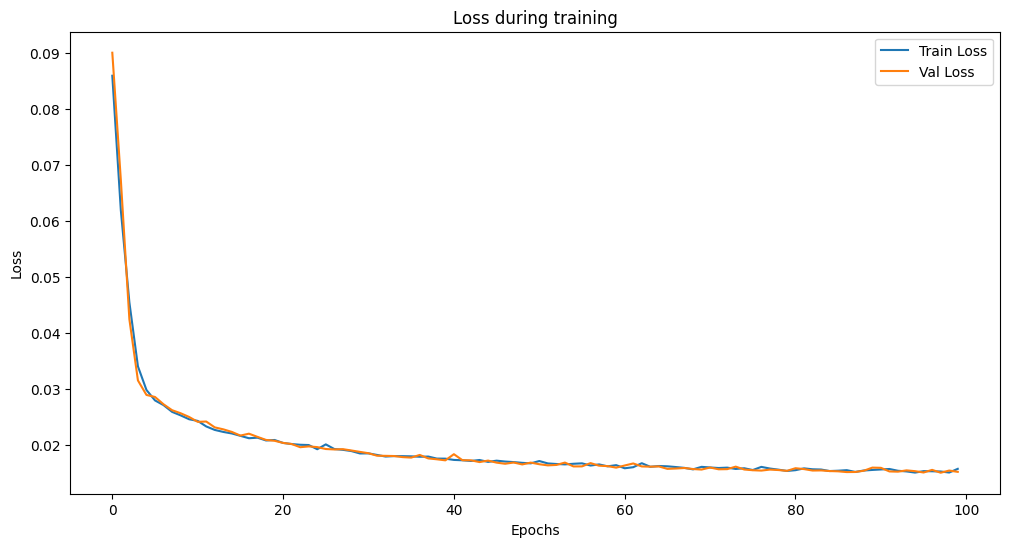

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0159 - mae: 0.0786 - mse: 0.0159
Validation Loss : 0.014987499453127384
Validation MAE: 0.07134564965963364
Validation MSE: 0.014987499453127384
Validation RMSE: 0.12242344323342398
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Test MAE: 226.9088134765625
Test MSE: 129197.8203125
Test RMSE: 359.4409830730213
Test R²: 0.7201287150382996
Test CVRMSE: 0.6227396197130257


In [431]:
model2, history2, loss2, mae2, mse2, rmse2, mae_test2, mse_test2, rmse_test2, r2, cvrmse, predictions2 = model_lstm(
    X_train2, 
    y_train2, 
    X_test2, 
    y_test2, 
    scaler_X, 
    scaler_y
)
  

In [420]:
import numpy as np

print("Nombre de NaN dans X_train2 :", np.isnan(X_train2).sum())
print("Nombre de NaN dans X_test2 :", np.isnan(X_test2).sum())
print("Nombre de NaN dans y_train2 :", np.isnan(y_train2).sum())
print("Nombre de NaN dans y_test2 :", np.isnan(y_test2).sum())


Nombre de NaN dans X_train2 : 530
Nombre de NaN dans X_test2 : 254
Nombre de NaN dans y_train2 : 0
Nombre de NaN dans y_test2 : 0


----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Prédiction du profil de consommation de chauffage
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------

Évaluation de Random Forest...


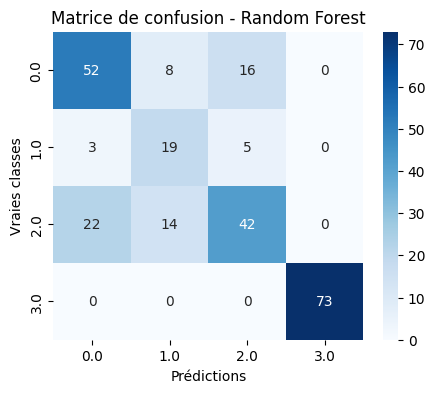

Random Forest - F1: 0.7331 - Accuracy: 0.7323 - Temps: 0.98s
###################################################################

Évaluation de Logistic Regression...


c:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


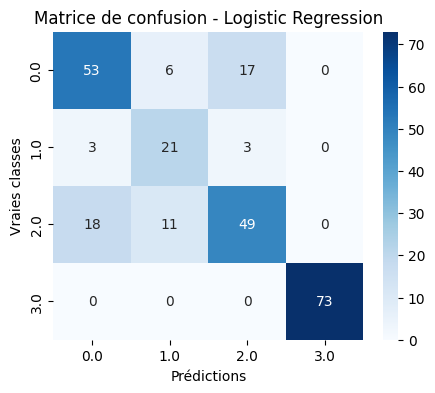

Logistic Regression - F1: 0.7723 - Accuracy: 0.7717 - Temps: 0.66s
###################################################################

Évaluation de SVC...


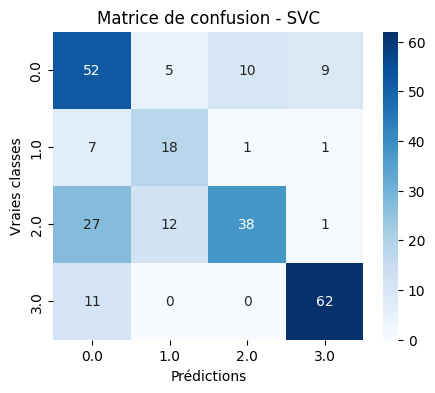

SVC - F1: 0.6695 - Accuracy: 0.6693 - Temps: 0.10s
###################################################################

Évaluation de KNN...


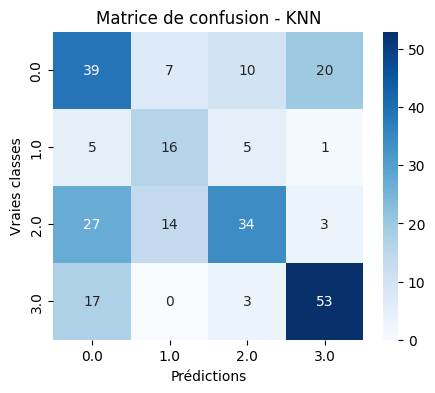

KNN - F1: 0.5592 - Accuracy: 0.5591 - Temps: 0.02s
###################################################################

Évaluation de Gradient Boosting...


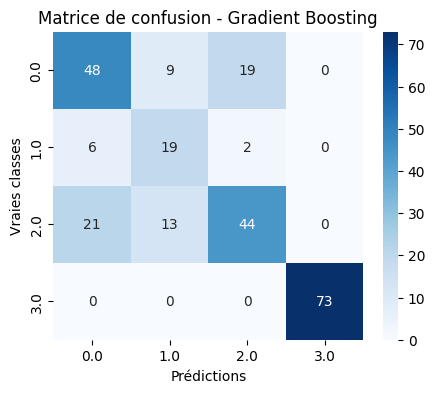

Gradient Boosting - F1: 0.7260 - Accuracy: 0.7244 - Temps: 4.89s
###################################################################


In [242]:
print("-"*100)
print("-"*100)
print("Prédiction du profil de consommation de chauffage")
print("-"*100)
print("-"*100)

Text_conso_heat_tou.columns = Text_conso_heat_tou.columns.astype(str)

re, Test_Text_heat_toulouse = evaluate_models_split(
    df=Text_conso_heat_tou.drop(columns=["Date"]),
    target_cols="clusters_1",
    models=models,
    split_ratio=8
)

Shape of X: (2554, 76)
Shape of y: (2554, 24)
Epoch 1/100


c:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.7544 - mae: 0.5306 - mse: 0.7544 - val_loss: 0.4525 - val_mae: 0.2851 - val_mse: 0.4525
Epoch 2/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3730 - mae: 0.3256 - mse: 0.3730 - val_loss: 0.3555 - val_mae: 0.2417 - val_mse: 0.3555
Epoch 3/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3247 - mae: 0.2949 - mse: 0.3247 - val_loss: 0.3153 - val_mae: 0.2227 - val_mse: 0.3153
Epoch 4/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2687 - mae: 0.2574 - mse: 0.2687 - val_loss: 0.2961 - val_mae: 0.2229 - val_mse: 0.2961
Epoch 5/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2901 - mae: 0.2752 - mse: 0.2901 - val_loss: 0.2770 - val_mae: 0.2040 - val_mse: 0.2770
Epoch 6/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2615 - mae: 0.2521 - mse: 0.2615 - val_loss: 0.2465 - val_mae: 0.1963 - val_mse: 0.2465
Epoch 7/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2541 - mae: 0.2510 - mse: 0.2541 - val_loss: 0.2355 - va

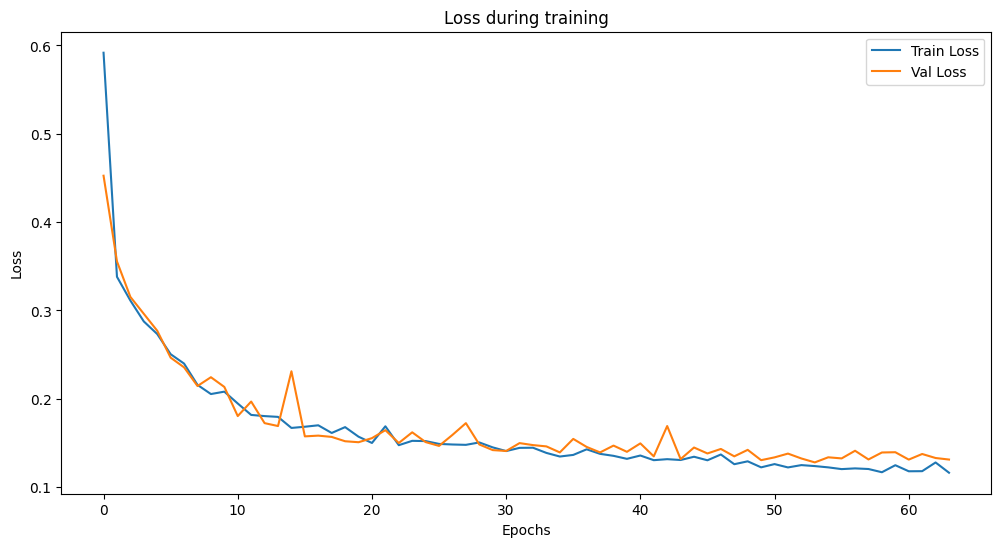

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2604 - mae: 0.2428 - mse: 0.2604
Validation Loss : 0.12788206338882446
Validation MAE: 0.13777922093868256
Validation MSE: 0.12788206338882446
Validation RMSE: 0.35760601699191874
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Test MAE: 105.16493950528576
Test MSE: 48375.99755048795
Test RMSE: 219.94544221349062
Test R²: 0.845933014576281
Test CVRMSE: 0.7129812011781018


NameError: name 'results' is not defined

In [ ]:


Text_conso = pd.concat([Text_combined, consommation_chauffage.iloc[:, 1:-1]], axis=1).reset_index(drop=True)
Text_conso.columns = Text_conso.columns.astype(str)


df2 = Text_conso.drop(columns=["Date"]).copy()
scaler_temp2 = StandardScaler() 
scaler_cons2 = StandardScaler()

df_scaled2 = np.hstack([
    scaler_temp2.fit_transform(df2.iloc[:, :24]),   
    df2.iloc[:, 24:25].values,  # Colonne heat_on 
    df2.iloc[:, 25:26].values,
    scaler_cons2.fit_transform(df2.iloc[:, 26:]),  
])

df_final2 = pd.DataFrame(df_scaled2, columns=df2.columns)
data2 = df_final2.values  
time_steps = 1  

X2, y2 = [], []
for i in range(1, len(data2)):
    X2.append(np.hstack([data2[i-1, :], data2[i, :24], data2[i, 24:26]])) 
    y2.append(data2[i, 26:]) 
X2, y2 = np.array(X2), np.array(y2)

print("Shape of X:", X2.shape) 
print("Shape of y:", y2.shape) 

X2 = X2.reshape(X2.shape[0], 1, X2.shape[1]) 

X_train2=X2[:int((X2.shape[0]*8)/10),:]
X_test2=X2[int((X2.shape[0]*8)/10):,:]
y_train2=y2[:int((y2.shape[0]*8)/10),:]
y_test2=y2[int((y2.shape[0]*8)/10):,:]


model2 = Sequential()
model2.add(LSTM(68, activation='tanh', input_shape=(X_train2.shape[1], X_train2.shape[2])))  
model2.add(Dropout(0.2))
model2.add(Dense(24, activation='linear'))   

history2, loss2, mae2, mse2, rmse2, mae_test2, mse_test2, rmse_test2, r2, cvrmse, predictions2 = train_and_evaluate(
    model2, X_train2, y_train2,X_test2 , y_test2, scaler_temp2, scaler_cons2)
        
results.append({
            "model": model_name_clean,
            "loss": loss2,
            "mae": mae2,
            "mse": mse2,
            "rmse": rmse2,
            "mae_test": mae_test2,
            "mse_test": mse_test2,
            "rmse_test": rmse_test2,
            "r2": r2,
            "cvrmse": cvrmse,
        })

for result in results:
    print("*" * 50)
    print("*" * 50)
    print(f"Résultats pour le modèle {result['model']}:")
    print(f"Loss: {result['loss']}, MAE: {result['mae']}, MSE: {result['mse']}, RMSE: {result['rmse']}")
    print(f"MAE Test: {result['mae_test']}, MSE Test: {result['mse_test']}, RMSE Test: {result['rmse_test']}")
    print(f"R2: {result['r2']}, CVRMSE: {result['cvrmse']}")
    print("*" * 50)
    print("*" * 50)


In [318]:
Text_conso_heat_tou.rename(columns={'clusters_1': 'y_pred_Gradient Boosting_clusters_1'}, inplace=True)

In [322]:
Test_Text_heat_toulouse

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,heat_on,y_true_clusters_1,y_pred_Random Forest_clusters_1,y_pred_Logistic Regression_clusters_1,y_pred_SVC_clusters_1,y_pred_KNN_clusters_1,y_pred_Gradient Boosting_clusters_1
1933,9.545,9.315,8.875,8.600,8.410,8.385,8.855,10.425,12.625,14.800,...,13.265,11.630,10.405,1,0.0,0.0,0.0,3.0,3.0,0.0
1934,9.680,8.875,7.995,7.330,6.815,6.435,7.165,9.400,12.565,16.130,...,15.920,14.810,13.910,0,3.0,3.0,3.0,3.0,3.0,3.0
1935,13.195,12.480,11.725,10.970,10.400,9.930,10.285,11.805,13.680,15.430,...,15.530,15.055,14.835,0,3.0,3.0,3.0,3.0,3.0,3.0
1936,14.825,14.935,14.920,14.520,14.075,13.800,13.645,13.755,13.935,14.140,...,11.905,10.995,9.975,0,3.0,3.0,3.0,3.0,3.0,3.0
1937,9.235,8.765,8.755,8.775,8.705,8.695,9.020,9.960,11.590,13.860,...,12.270,11.835,11.420,0,3.0,3.0,3.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2550,6.590,6.480,6.280,6.235,6.215,6.090,5.925,5.740,5.530,5.370,...,4.310,4.000,3.610,1,2.0,1.0,2.0,1.0,2.0,1.0
2551,3.025,2.570,2.105,1.640,1.165,0.835,0.600,0.355,0.255,0.015,...,3.650,2.930,1.945,1,2.0,2.0,2.0,2.0,2.0,2.0
2552,1.180,0.855,0.530,0.130,-0.230,-0.565,-0.910,-1.245,-1.405,-1.105,...,3.045,2.060,1.485,1,2.0,2.0,2.0,2.0,2.0,2.0
2553,1.145,0.350,-0.360,-0.480,-0.235,-0.165,-0.150,-0.035,0.020,0.145,...,2.635,2.220,1.900,1,0.0,1.0,1.0,1.0,1.0,2.0


In [321]:


print("\t")
print("-"*100)
print("-"*100)
print("Prédiction du 24 heures de consommation de chauffage")
print("-"*100)
print("-"*100)

X_train2, X_test2, y_train2, y_test2 , scaler_temp, scaler_cons  = preprocess_data(
    df_Text,
    Text_combined,
    Test_Text_heat_toulouse,
    "Text_combined_toulouse"
)

model2, history2, loss2, mae2, mse2, rmse2, mae_test2, mse_test2, rmse_test2, r2, cvrmse, predictions2 = model_lstm(
    X_train2, 
    y_train2, 
    X_test2, 
    y_test2, 
    scaler_temp, 
    scaler_cons
)
  

	
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Prédiction du 24 heures de consommation de chauffage
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
(254,)
Shape of df.iloc[split_index:]: (0, 27)


UnboundLocalError: cannot access local variable 'cluster_idx' where it is not associated with a value

In [ ]:
def preprocess_data(Text_combined, clustering_heat, Test_Text_heat, name_combined):
    """
    -Cette fonction prépare les données pour un modèle LSTM.
    -L'équilibrage de la classe majoritaire est effectué uniquement sur les jours prédits, 
    et n'est pas effectué sur les jours passés utilisés comme entrées (t-1).
    -La prédiction est faite en fonction des différentes données d'entrée et de consommation,
    ainsi que du profil réel à t-1 et des différentes données d'entrée et des profils prédits à t.
    """
    print(Test_Text_heat["y_pred_Gradient Boosting_clusters_1"].shape)
    # Calcul de l'indice de séparation (80% des données)
    split_index = int(0.8 * len(clustering_heat))
    # Copie du DataFrame de texte combiné
    df = Text_combined.copy()
    # Ajout de la colonne 'heat_on' issue du clustering
    df['heat_on'] = clustering_heat['heat_on']
    print("Shape of df.iloc[split_index:]:", df.iloc[split_index:].shape)


    print(len(df.loc[split_index:, f'clusters_{cluster_idx}']), len(Test_Text_heat.loc[:, cluster_col_name].values))

    # Vérification des colonnes dupliquées dans df
    duplicates_df = df.columns[df.columns.duplicated()]
    # Vérification des colonnes dupliquées dans clustering_heat
    duplicates_clustering_heat = clustering_heat.columns[clustering_heat.columns.duplicated()]
    # Si doublons dans df, rendre les noms uniques
    if len(duplicates_df) > 0:
        df.columns = make_column_names_unique(df.columns)
    # Si doublons dans clustering_heat, rendre les noms uniques
    if len(duplicates_clustering_heat) > 0:
        clustering_heat.columns = make_column_names_unique(clustering_heat.columns)

    # Sélection des colonnes liées aux clusters
    cluster_cols = clustering_heat.filter(like='cluster').columns
    # Assignation des clusters sur la partie train (jours passés)
    df.loc[:split_index - 1, cluster_cols] = clustering_heat.loc[:split_index - 1, cluster_cols]

    # Sélection des colonnes de prédiction de clusters dans Test_Text_heat
    cluster_cols2 = Test_Text_heat.filter(like='y_pred_Gradient').columns
    # Pour chaque cluster prédit, ajout dans df pour la partie test (jours futurs)
    
    for cluster_idx in range(1, len(cluster_cols2) + 1):
        cluster_col_name = f'y_pred_Gradient Boosting_clusters_{cluster_idx}'
        print(f"Processing Cluster {cluster_idx}: {cluster_col_name}")
        print("Shape of Test_Text_heat.loc[:, cluster_col_name]:", Test_Text_heat.loc[:, cluster_col_name].shape)
        print(len(df.loc[split_index:, f'clusters_{cluster_idx}']), len(Test_Text_heat.loc[:, cluster_col_name].values))
        df.loc[split_index:, f'clusters_{cluster_idx}'] = Test_Text_heat.loc[:, cluster_col_name].values

    # Rendre les noms de colonnes uniques dans df
    df.columns = make_column_names_unique(df.columns)

    # Ajout de colonnes supplémentaires pour l'équilibrage, avec un ID jour
    df = pd.concat([pd.Series(range(len(clustering_heat))), df, clustering_heat.iloc[:, :-(len(cluster_cols) + 1)]], axis=1).reset_index(drop=True)

    # Gestion des colonnes dupliquées après concaténation
    duplicates = df.columns[df.columns.duplicated()]
    df.columns = make_column_names_unique(df.columns)
    df.columns = df.columns.astype(str)

    # Application du downsampling sur la classe majoritaire ('heat_on')
    df2 = downsample_majority_class(df, 'heat_on')
    df2.columns = make_column_names_unique(df2.columns)

    # Calcul du nombre de blocs en fonction du nom de fichier
    n_blocks = len(name_combined.split('_combined')[0].split('_'))
    parts = name_combined.split('_combined')[0].split('_')
    formatted = ' and '.join(parts)
    print(f"Prediction based on : {formatted}")

    # Nombre de colonnes température (24h * nombre de blocs)
    n_temp_cols = 24 * n_blocks

    # Initialisation des scalers pour la température et la consommation
    scaler_temp = StandardScaler()
    scaler_cons = StandardScaler()

    # Sélection des colonnes clusters dans df et df2
    cluster_cols = df.columns[df.columns.str.contains('clusters_')]
    cluster_cols2 = df2.columns[df2.columns.str.contains('clusters_')]

    # Standardisation et assemblage des données pour df
    df_scaled = np.hstack([
        df.iloc[:, 0:1].values,  # ID du jour
        scaler_temp.fit_transform(df.iloc[:, 1:1 + n_temp_cols]),  # Température
        df.iloc[:, 1 + n_temp_cols:1 + n_temp_cols + 1].values,  # 'heat_on'
        df[cluster_cols].values,  # Clusters
        scaler_cons.fit_transform(df.iloc[:, -24:])  # Consommation
    ])

    # Standardisation et assemblage des données pour df2 (données équilibrées)
    df_scaled2 = np.hstack([
        df2.iloc[:, 0:1].values,  # ID du jour
        scaler_temp.fit_transform(df2.iloc[:, 1:1 + n_temp_cols]),  # Température
        df2.iloc[:, 1 + n_temp_cols:1 + n_temp_cols + 1].values,  # 'heat_on'
        df2[cluster_cols2].values,  # Clusters
        scaler_cons.fit_transform(df2.iloc[:, -24:])  # Consommation
    ])

    # Conversion des arrays numpy en DataFrames
    df_final = pd.DataFrame(df_scaled, columns=df.columns)
    df_final2 = pd.DataFrame(df_scaled2, columns=df2.columns)

    # Extraction des valeurs numpy
    data = df_final.values
    data2 = df_final2.values
    # Filtrage des jours avec ID non nul
    data2 = data2[data2[:, 0] != 0]

    # Initialisation des listes d'entrées et cibles
    X2, y2 = [], []
    for i in data2[:, 0]:
        # Données du jour précédent
        prev_data = data[data[:, 0] == i - 1, 1:]
        # Données du jour courant avec features sélectionnées
        current_data2 = data2[data2[:, 0] == i, 1:1 + n_temp_cols + len(cluster_cols) + 1]
        # Assemblage des données d'entrée (t-1 et t)
        X2.append(np.hstack([prev_data, current_data2]))
        # Cibles pour la prédiction
        y2.append(data2[data2[:, 0] == i, 1 + n_temp_cols + 1 + len(cluster_cols):])

    # Conversion en arrays numpy
    X2, y2 = np.array(X2), np.array(y2)
    # Reshape pour correspondre aux dimensions attendues par le modèle LSTM
    X2 = X2.reshape(X2.shape[0], X2.shape[2])
    y2 = y2.reshape(y2.shape[0], y2.shape[2])
    X2 = X2.reshape(X2.shape[0], 1, X2.shape[1])

    # Séparation train/test sur les données transformées
    idx_split = int((X2.shape[0] * 8) / 10)
    X_train2 = X2[:idx_split, :].astype(float)
    X_test2 = X2[idx_split:, :].astype(float)
    y_train2 = y2[:idx_split, :].astype(float)
    y_test2 = y2[idx_split:, :].astype(float)

    # Retourne les données train/test et les scalers
    return X_train2, X_test2, y_train2, y_test2, scaler_temp, scaler_cons
